# 关于o2o优惠券使用的数据分析

## 1.分析背景 

### O2O行业天然关联数亿消费者，各类APP每天记录了超过百亿条用户行为和位置记录，因而成为大数据科研和商业化运营的最佳结合点之一。
### 以优惠券盘活老用户或吸引新客户进店消费是O2O的一种重要营销方式。然而随机投放的优惠券对多数用户造成无意义的干扰。个性化投放是提高优惠券核销率的重要技术，它可以让具有一定偏好的消费者得到真正的实惠，同时赋予商家更强的营销能力。
### 对用户在2016年1月1日至2016年6月30日之间真实线上线下消费行为进行分析，预测用户在2016年7月领取优惠券后15天以内的使用情况。

## 2.分析目的 

### 2.1对用户进行分类

### 2.2建立优惠券使用预测模型

### 2.3对用户领券与最终消费的影响因素进行分析

## 3.数据处理

### 3.1数据理解

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv('D:\project\o2o优惠券使用预测\data\ccf_offline_stage1_train.csv')
df2=pd.read_csv('D:\project\o2o优惠券使用预测\data\ccf_online_stage1_train.csv')
df_test=pd.read_csv('D:\project\o2o优惠券使用预测\data\ccf_offline_stage1_test_revised.csv')

In [3]:
df1.head() #查看数据

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [4]:
df1.info() #查看数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User_id        int64  
 1   Merchant_id    int64  
 2   Coupon_id      float64
 3   Discount_rate  object 
 4   Distance       float64
 5   Date_received  float64
 6   Date           float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


In [5]:
df2.head()

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User_id        int64  
 1   Merchant_id    int64  
 2   Action         int64  
 3   Coupon_id      object 
 4   Discount_rate  object 
 5   Date_received  float64
 6   Date           float64
dtypes: float64(2), int64(3), object(2)
memory usage: 610.4+ MB


### 3.2数据清洗

In [7]:
# df1 线下数据清洗

In [8]:
#统计'User_id'，其值为F_value，合成新表

#用户活跃次数
df1_ID_F=pd.DataFrame({
    'User_id':np.array(df1['User_id'].value_counts().index).flatten(),
    'F_value':df1['User_id'].value_counts().values.flatten(),
}) 

#按原表顺序合并
df1_F=pd.merge(pd.DataFrame(df1['User_id']),df1_ID_F,on='User_id')
df1_F.head()

,User_id,F_value
0,1439408,7
1,1439408,7
2,1439408,7
3,1439408,7
4,1439408,7


In [9]:
#统计'Coupon_id'，其值为C_value，合成新表

#用户领券次数
df1_ID_C=pd.DataFrame({
    'User_id':np.array(df1.groupby('User_id')['Coupon_id'].count().index).flatten(),
    'C_value':df1.groupby('User_id')['Coupon_id'].count().values.flatten(),
}) 

#按原表顺序合并
df1_FC=pd.merge(df1_F,df1_ID_C,on='User_id')
df1_FC.head()

,User_id,F_value,C_value
0,1439408,7,5
1,1439408,7,5
2,1439408,7,5
3,1439408,7,5
4,1439408,7,5


In [10]:
#统计'Date'，其值为D_value，合成新表

#用户消费次数
df1_ID_D=pd.DataFrame({
    'User_id':np.array(df1.groupby('User_id')['Date'].count().index).flatten(),
    'D_value':df1.groupby('User_id')['Date'].count().values.flatten(),
})

#按原表顺序合并
df1_FCD=pd.merge(df1_FC,df1_ID_D,on='User_id')
df1_FCD.head()

,User_id,F_value,C_value,D_value
0,1439408,7,5,3
1,1439408,7,5,3
2,1439408,7,5,3
3,1439408,7,5,3
4,1439408,7,5,3


In [11]:
#去除重复的用户ID,得到最终的表格
FCD_off = df1_FCD.drop_duplicates(subset=['User_id'],keep='last')
FCD_off.head()

,User_id,F_value,C_value,D_value
6,1439408,7,5,3
7,1832624,1,1,0
12,2029232,5,3,2
13,2747744,1,1,0
15,196342,2,1,1


In [12]:
# df2 线上数据清洗

In [13]:
#统计'User_id'，其值为F_value，合成新表

#用户活跃次数
df2_ID_F=pd.DataFrame({
    'User_id':np.array(df2['User_id'].value_counts().index).flatten(),
    'F_value':df2['User_id'].value_counts().values.flatten(),
}) 

#按原表顺序合并
df2_F=pd.merge(pd.DataFrame(df2['User_id']),df2_ID_F,on='User_id')
df2_F.head()

,User_id,F_value
0,13740231,16
1,13740231,16
2,13740231,16
3,13740231,16
4,13740231,16


In [14]:
#统计'Coupon_id'，其值为C_value，合成新表

#用户领券次数
df2_ID_C=pd.DataFrame({
    'User_id':np.array(df2.groupby('User_id')['Coupon_id'].count().index).flatten(),
    'C_value':df2.groupby('User_id')['Coupon_id'].count().values.flatten(),
}) 

#按原表顺序合并
df2_FC=pd.merge(df2_F,df2_ID_C,on='User_id')
df2_FC.head()

,User_id,F_value,C_value
0,13740231,16,6
1,13740231,16,6
2,13740231,16,6
3,13740231,16,6
4,13740231,16,6


In [15]:
#统计'Date'，其值为D_value，合成新表

#用户消费次数
df2_ID_D=pd.DataFrame({
    'User_id':np.array(df2.groupby('User_id')['Date'].count().index).flatten(),
    'D_value':df2.groupby('User_id')['Date'].count().values.flatten(),
})

#按原表顺序合并
df2_FCD=pd.merge(df2_FC,df2_ID_D,on='User_id')
df2_FCD.head()

,User_id,F_value,C_value,D_value
0,13740231,16,6,10
1,13740231,16,6,10
2,13740231,16,6,10
3,13740231,16,6,10
4,13740231,16,6,10


In [16]:
#去除重复的用户ID,得到最终的表格
FCD_on= df2_FCD.drop_duplicates(subset=['User_id'],keep='last')
FCD_on.head()

,User_id,F_value,C_value,D_value
15,13740231,16,6,10
32,14336199,17,0,17
35,10539231,3,0,3
42,14438631,7,0,7
65,15034599,23,0,23


## 4.数据建模

### 4.1线下用户

In [17]:
# 用户活跃：F_value>3高活跃 否则低活跃
# 用户领券：C_value/F_value>1/2高领券 否则低领券
# 用户消费：D_value/F_value>1/2 and D_value>1高消费 否则低消费
# 重要客户：高活跃高领券高消费 ，高活跃低领券高消费 
# 价值客户：低活跃高领券高消费，低活跃低领券高消费
# 保持客户：高活跃高领券低消费，高活跃低领券低消费
# 发展客户：低活跃低领券低消费，低活跃高领券低消费

In [18]:
df1['User_id'].value_counts().describe()
#用户活跃值，最大值264，最小值1，平均值3  75%的数据>=3

count    539438.000000
mean          3.253171
std           4.767551
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         264.000000
Name: User_id, dtype: float64

In [19]:
df1.groupby('User_id')['Date'].count().describe()
#用户消费 75%的数据>=1

count    539438.000000
mean          1.440358
std           3.986049
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         196.000000
Name: Date, dtype: float64

In [20]:
#用户分类函数
#x:F_value y:C_value z:D_value
def UL1(x,y,z):
    if x>3:
        if y/x > 1/2:
            if z/x > 1/2 and z>1:
                return('重要客户')
            else:
                return('保持客户')
        else:
            if z/x > 1/2 and z>1:
                return('重要客户') 
            else:
                return('保持客户')
    else:
        if y/x > 1/2:
            if z/x > 1/2 and z>1:
                return('价值客户')
            else:
                return('发展客户')
        else:
            if z/x > 1/2 and z>1:
                return('价值客户') 
            else:
                return('发展客户')

In [21]:
FCD_off['User_level']=FCD_off.apply(lambda x:UL1(x['F_value'],x['C_value'],x['D_value']),axis=1)
FCD_off.head()

,User_id,F_value,C_value,D_value,User_level
6,1439408,7,5,3,保持客户
7,1832624,1,1,0,发展客户
12,2029232,5,3,2,保持客户
13,2747744,1,1,0,发展客户
15,196342,2,1,1,发展客户


In [22]:
#查看各类用户占比
FCD_off.groupby('User_level').count()

,User_id,F_value,C_value,D_value
User_level,,,,
价值客户,23225,23225,23225,23225
保持客户,71893,71893,71893,71893
发展客户,383843,383843,383843,383843
重要客户,60477,60477,60477,60477


<function matplotlib.pyplot.show(*args, **kw)>

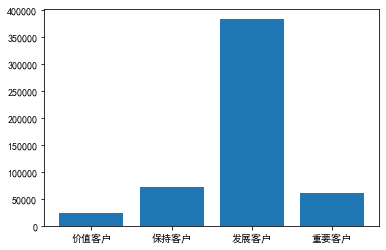

In [23]:
#用户类型占比图
plt.bar(FCD_off.groupby('User_level').count().index,FCD_off.groupby('User_level').count()['User_id'])
plt.show

### 4.2线上用户

In [24]:
# 用户活跃：F_value>16 高活跃 否则低活跃
# 用户领券：C_value/F_value>1/2高领券 否则低领券
# 用户消费：D_value/F_value>1/2 and D_value>15高消费 否则低消费
# 重要客户：高活跃高领券高消费 ，高活跃低领券高消费 
# 价值客户：低活跃高领券高消费，低活跃低领券高消费
# 保持客户：高活跃高领券低消费，高活跃低领券低消费
# 发展客户：低活跃低领券低消费，低活跃高领券低消费

In [25]:
df2['User_id'].value_counts().describe()
#用户活跃值，最大值5786，最小值1，平均值14.9  75%的数据>=16

count    762858.000000
mean         14.982901
std          34.890628
min           1.000000
25%           3.000000
50%           7.000000
75%          16.000000
max        5786.000000
Name: User_id, dtype: float64

In [26]:
df2.groupby('User_id')['Date'].count().describe()
#用户消费 75%的数据>=15

count    762858.000000
mean         14.123111
std          34.512140
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        5786.000000
Name: Date, dtype: float64

In [27]:
#用户分类函数
#x:F_value y:C_value z:D_value
def UL2(x,y,z):
    if x>16:
        if y/x > 1/2:
            if z/x > 1/2 and z>15:
                return('重要客户')
            else:
                return('保持客户')
        else:
            if z/x > 1/2 and z>15:
                return('重要客户') 
            else:
                return('保持客户')
    else:
        if y/x > 1/2:
            if z/x > 1/2 and z>15:
                return('价值客户')
            else:
                return('发展客户')
        else:
            if z/x > 1/2 and z>15:
                return('价值客户') 
            else:
                return('发展客户')

In [28]:
FCD_on['User_level']=FCD_on.apply(lambda x:UL2(x['F_value'],x['C_value'],x['D_value']),axis=1)
FCD_on.head()

,User_id,F_value,C_value,D_value,User_level
15,13740231,16,6,10,发展客户
32,14336199,17,0,17,重要客户
35,10539231,3,0,3,发展客户
42,14438631,7,0,7,发展客户
65,15034599,23,0,23,重要客户


In [29]:
#查看各类用户占比
FCD_on.groupby('User_level').count()

,User_id,F_value,C_value,D_value
User_level,,,,
价值客户,8405,8405,8405,8405
保持客户,9892,9892,9892,9892
发展客户,573150,573150,573150,573150
重要客户,171411,171411,171411,171411


<function matplotlib.pyplot.show(*args, **kw)>

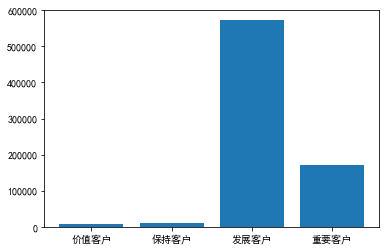

In [30]:
#用户类型占比图
plt.bar(FCD_on.groupby('User_level').count().index,FCD_on.groupby('User_level').count()['User_id'])
plt.show

In [31]:
#从数据可以看出：1.线上线下发展用户（消费次数少或者领券不消费）占比最多
#                2.线下领券消费与不领券消费用户区别不大。线上用户更倾向于领券消费，用户数量差值约17倍

## 5.数据分析 

### 5.1线下用户优惠券使用情况

#### 5.1.1用户领取优惠券并消费与门店距离分析

In [32]:
#查看最近门店距离分布
df1.groupby('Distance').count()[['User_id','Coupon_id','Date']]

,User_id,Coupon_id,Date
Distance,,,
0.0,826070,348179,524743
1.0,227221,143871,91952
2.0,118413,81279,40619
3.0,76598,54944,23515
4.0,55085,40542,15830
5.0,41452,31010,11273
6.0,32483,24658,8428
7.0,25681,19682,6429
8.0,21436,16404,5417


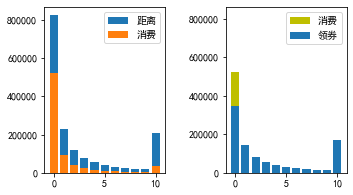

In [33]:
plt.suptitle#建立画板
plt.subplots_adjust(left=0.2, wspace=0.5, top=0.7) #调整位置

plt.subplot(121)#图一
plt.bar(df1.groupby('Distance').count().index,df1.groupby('Distance').count()['User_id'],label="距离")
plt.bar(df1.groupby('Distance').count().index,df1.groupby('Distance').count()['Date'],label="消费")
plt.legend()#显示标签

plt.subplot(122)#图二
plt.bar(df1.groupby('Distance').count().index,df1.groupby('Distance').count()['Date'],label="消费",color='y')
plt.bar(df1.groupby('Distance').count().index,df1.groupby('Distance').count()['Coupon_id'],label="领券")
plt.ylim((0,860000))
plt.legend()

plt.show()

In [34]:
#门店距离用户越近，用户消费次数越多
#用户领券次数基本大于消费次数，但是在门店距离<500m的条件下，有1/3的用户不领券消费

#### 5.1.2用户领取优惠券并消费与优惠率分析

In [35]:
#根据优惠率统计优惠领取次数和消费次数
df1.groupby('Discount_rate').count()[['Coupon_id','Date']]

,Coupon_id,Date
Discount_rate,,
0.2,110,6
0.5,186,20
0.6,58,3
0.7,54,4
0.75,121,5
0.8,3441,635
0.85,649,43
0.9,8085,616
0.95,20568,2521


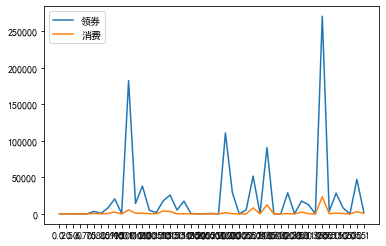

In [36]:
plt.plot(df1.groupby('Discount_rate').count().index,df1.groupby('Discount_rate').count()['Coupon_id'],label='领券')
plt.plot(df1.groupby('Discount_rate').count().index,df1.groupby('Discount_rate').count()['Date'],label='消费')
plt.legend()
plt.show()

#### 5.1.3用户领券时间与消费时间分析

In [37]:
#提取出领券并消费的用户
df1_days=df1.dropna(axis=0)[['User_id','Date_received','Date']]

In [38]:
#把日期由float转为datetime
pd.to_datetime(df1.dropna(axis=0)['Date_received'], format='%Y%m%d')
pd.to_datetime(df1.dropna(axis=0)['Date'], format='%Y%m%d')
#相减获得用户领券到消费的时间差
df1_days['days']=(pd.to_datetime(df1.dropna(axis=0)['Date'], format='%Y%m%d')-pd.to_datetime(df1.dropna(axis=0)['Date_received'], format='%Y%m%d')).astype('timedelta64[D]')
df1_days.groupby('days').count()

,User_id,Date_received,Date
days,,,
0.0,4949,4949,4949
1.0,7229,7229,7229
2.0,6253,6253,6253
3.0,4940,4940,4940
4.0,4652,4652,4652
...,...,...,...
69.0,1,1,1
70.0,1,1,1
71.0,1,1,1


(-1.0, 15.0)

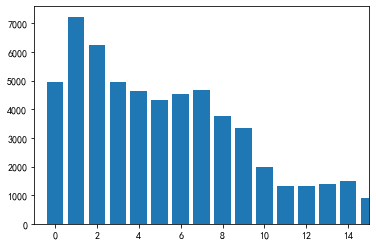

In [39]:
plt.bar(df1_days.groupby('days').count().index,df1_days.groupby('days').count()['User_id'])
plt.xlim(-1,15)

In [40]:
#领券后1-2天内消费的客户最多，随着时间增长，消费次数降低

### 5.1线上用户优惠券使用情况

#### 5.1.1用户领取优惠券并消费与优惠率分析

In [41]:
#根据优惠率统计优惠领取次数和消费次数
df2.groupby('Discount_rate').count()[['Coupon_id','Date']]

,Coupon_id,Date
Discount_rate,,
1000:10,291,35
1000:100,4135,478
1000:20,1013,167
1000:30,908,91
1000:300,456,48
...,...,...
800:20,1010,128
800:30,297,20
800:50,6732,550


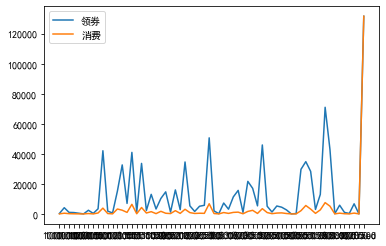

In [42]:
plt.plot(df2.groupby('Discount_rate').count().index,df2.groupby('Discount_rate').count()['Coupon_id'],label='领券')
plt.plot(df2.groupby('Discount_rate').count().index,df2.groupby('Discount_rate').count()['Date'],label='消费')
plt.legend()
plt.show()

In [43]:
#一些优惠活动确实会刺激用户消费，但是限时低价活动消费次数最高

#### 5.1.2用户领券时间与消费时间分析

In [44]:
#提取出领券并消费的用户
df2_days=df2.dropna(axis=0)[['User_id','Date_received','Date']]
df2_days.head()

,User_id,Date_received,Date
273,10131831,20160128.0,20160128.0
274,10131831,20160128.0,20160128.0
279,10131831,20160117.0,20160117.0
280,10131831,20160117.0,20160117.0
748,12518031,20160306.0,20160306.0


In [45]:
#把日期由float转为datetime
pd.to_datetime(df2.dropna(axis=0)['Date_received'], format='%Y%m%d')
pd.to_datetime(df2.dropna(axis=0)['Date'], format='%Y%m%d')
#相减获得用户领券到消费的时间差
df2_days['days']=(pd.to_datetime(df2.dropna(axis=0)['Date'], format='%Y%m%d')-pd.to_datetime(df2.dropna(axis=0)['Date_received'], format='%Y%m%d')).astype('timedelta64[D]')
df2_days.groupby('days').count()

,User_id,Date_received,Date
days,,,
0.0,192809,192809,192809
1.0,8478,8478,8478
2.0,3381,3381,3381
3.0,2402,2402,2402
4.0,1377,1377,1377
...,...,...,...
155.0,1,1,1
158.0,3,3,3
162.0,3,3,3


(-1.0, 15.0)

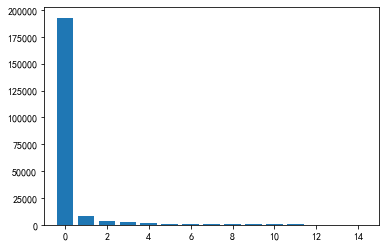

In [46]:
plt.bar(df2_days.groupby('days').count().index,df2_days.groupby('days').count()['User_id'])
plt.xlim(-1,15)

In [47]:
#线上用户领取优惠券当天消费最高